## Disease Condition prediction based on drug reviews

In this project, we will classify the condition of patients using the reviews of the drugs given by patients using drug reviews dataset available in [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29).

## Importing libraries

In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [29]:
!pip install BeautifulSoup4 

In [2]:
str1="I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."


lst = [str1]
lst

['I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.']

In [30]:
import nltk
import sklearn
import bs4
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The bs4 version is {}.'.format(bs4.__version__))

The nltk version is 3.7.
The scikit-learn version is 1.2.2.
The bs4 version is 4.12.2.


In [31]:
df=pd.read_csv('data\drugsComTest_raw.csv')

In [32]:
df.to_csv('data/drugsComTrain.csv',index=False)

In [33]:
df.head()

uniqueID         drugName                     condition  \
0  163740    Mirtazapine      Depression                     
1  206473    Mesalamine       Crohn's Disease, Maintenance   
2  159672    Bactrim          Urinary Tract Infection        
3  39293     Contrave         Weight Loss                    
4  97768     Cyclafem 1 / 35  Birth Control                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  \
0  "I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me."                                                                                                                                                                                                                                                                                                                                                          
1  "My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  "Quick reduction of symptoms"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3  "Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I 

In [34]:
df = df.dropna()

In [35]:
df.condition.value_counts()

Birth Control                                                     9648
Depression                                                        3095
Pain                                                              2100
Anxiety                                                           1908
Acne                                                              1847
Bipolar Disorde                                                   1380
Weight Loss                                                       1248
Insomnia                                                          1231
Obesity                                                           1189
ADHD                                                              1126
Emergency Contraception                                           827 
Vaginal Yeast Infection                                           811 
Diabetes, Type 2                                                  808 
High Blood Pressure                                               783 
Smokin

In [36]:
df.condition.value_counts().shape

(708,)

In [37]:
##df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [38]:
all_conditions = df['condition'].unique()
df_train = df[df['condition'].isin(all_conditions)]


In [39]:
df.shape

(53471, 7)

In [40]:
df_train.shape

(53471, 7)

In [41]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

## EDA

In [42]:
X.condition.value_counts()

Birth Control                                                     9648
Depression                                                        3095
Pain                                                              2100
Anxiety                                                           1908
Acne                                                              1847
Bipolar Disorde                                                   1380
Weight Loss                                                       1248
Insomnia                                                          1231
Obesity                                                           1189
ADHD                                                              1126
Emergency Contraception                                           827 
Vaginal Yeast Infection                                           811 
Diabetes, Type 2                                                  808 
High Blood Pressure                                               783 
Smokin

In [43]:
X.head()

condition  \
0  Depression                     
1  Crohn's Disease, Maintenance   
2  Urinary Tract Infection        
3  Weight Loss                    
4  Birth Control                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  
0  "I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me."                                                                                                                                                                                                                                                                                                                                                         
1  "My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
2  "Quick reduction of symptoms"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
3  "Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I have only been on it a few days, I don&#039;t know if I&#039;ve lost weight (I don&#039;t have a scale), but my clothes do feel a little looser, so maybe a pound or two. I&#039;m hoping

In [101]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Birth control')

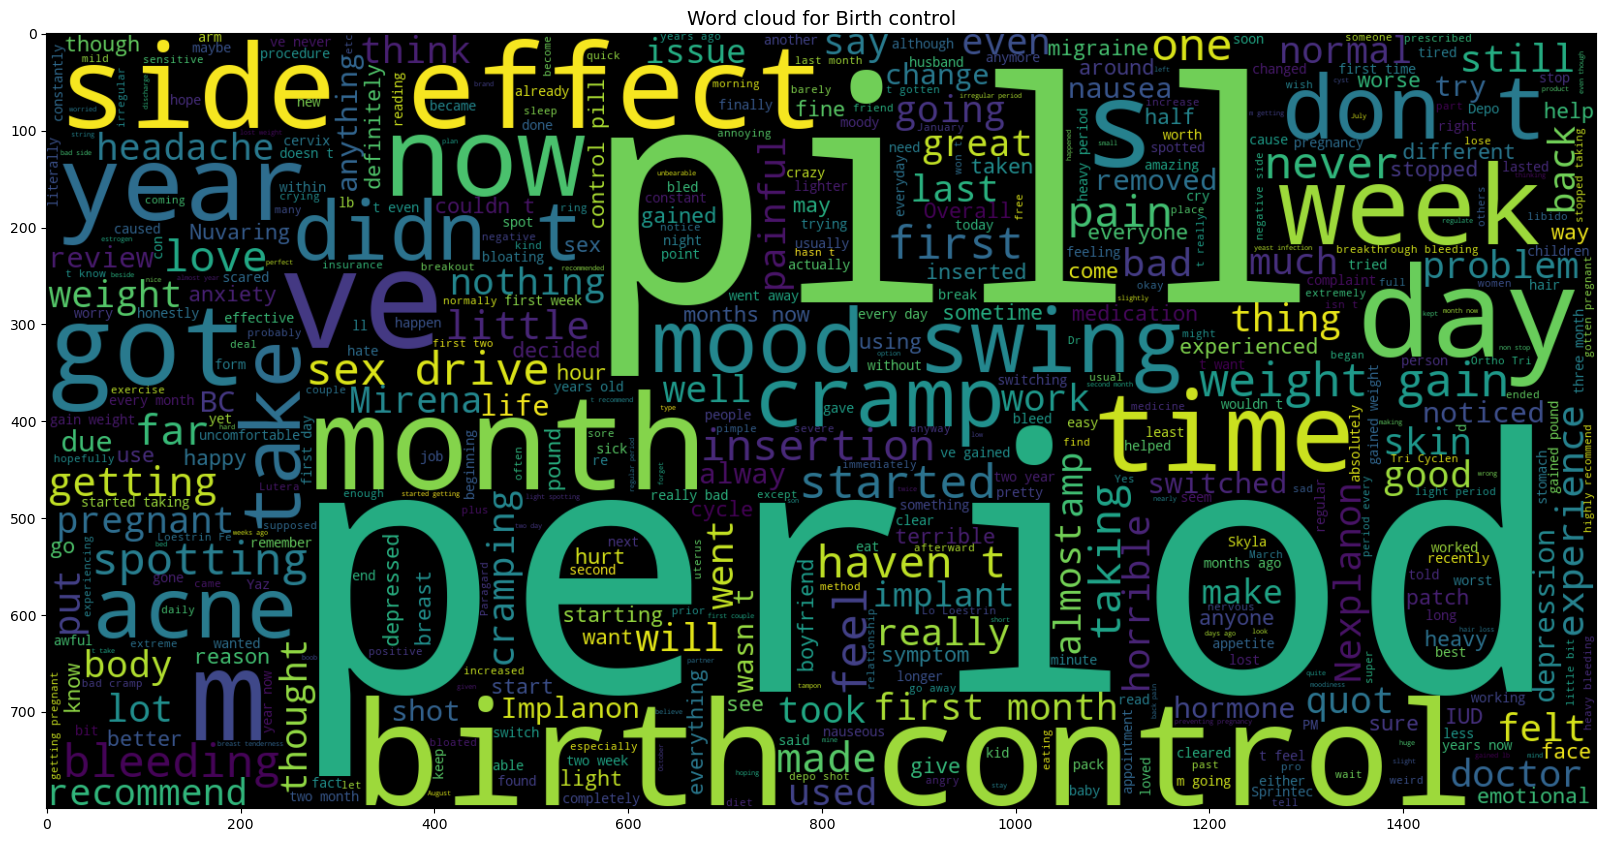

In [102]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

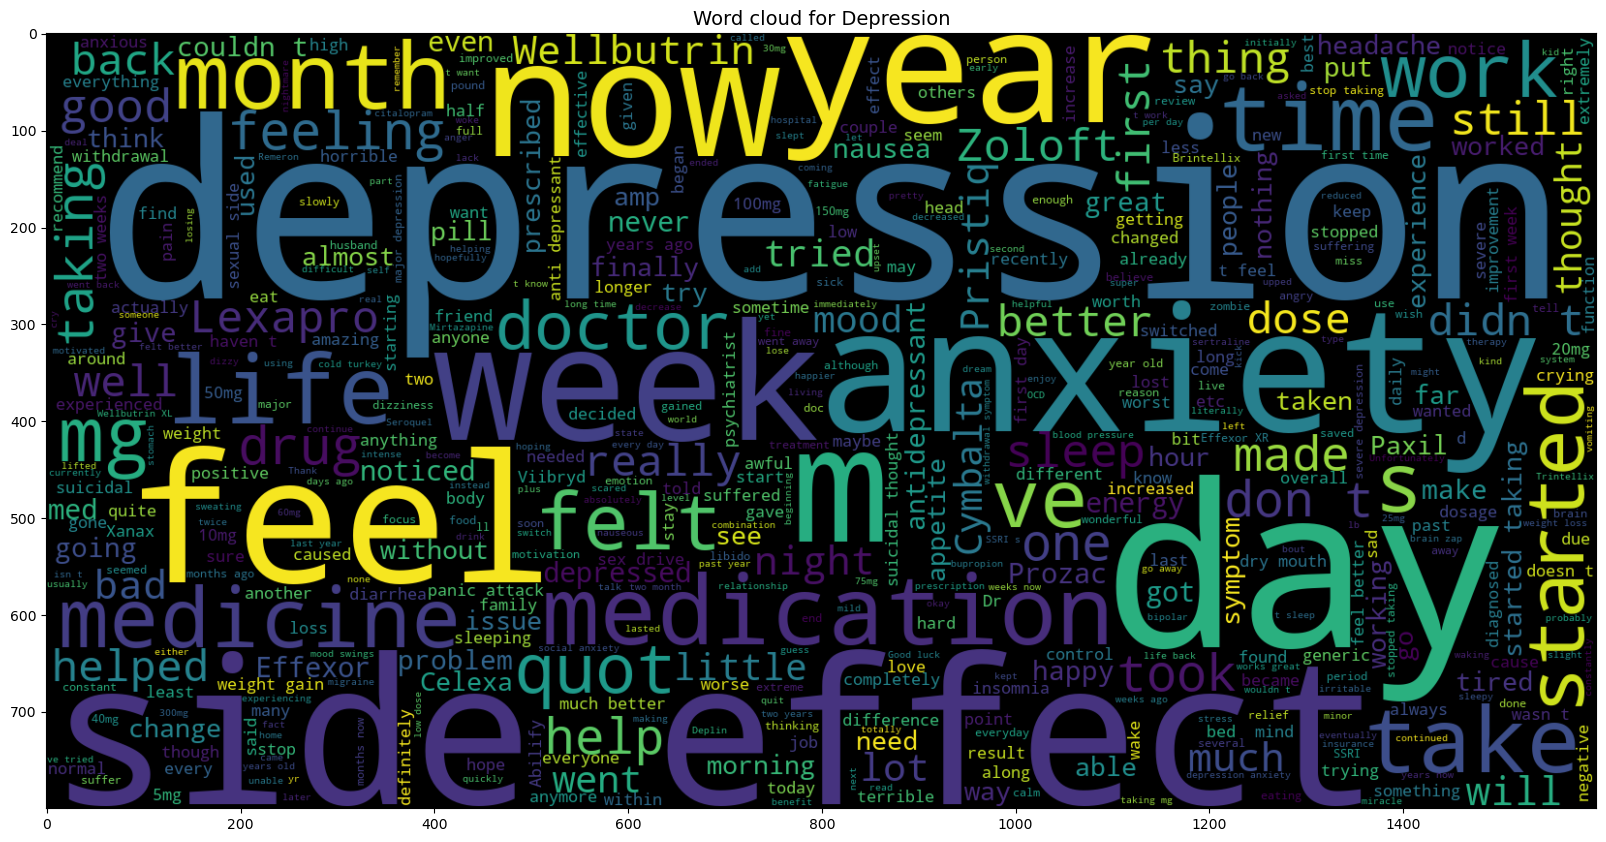

In [103]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

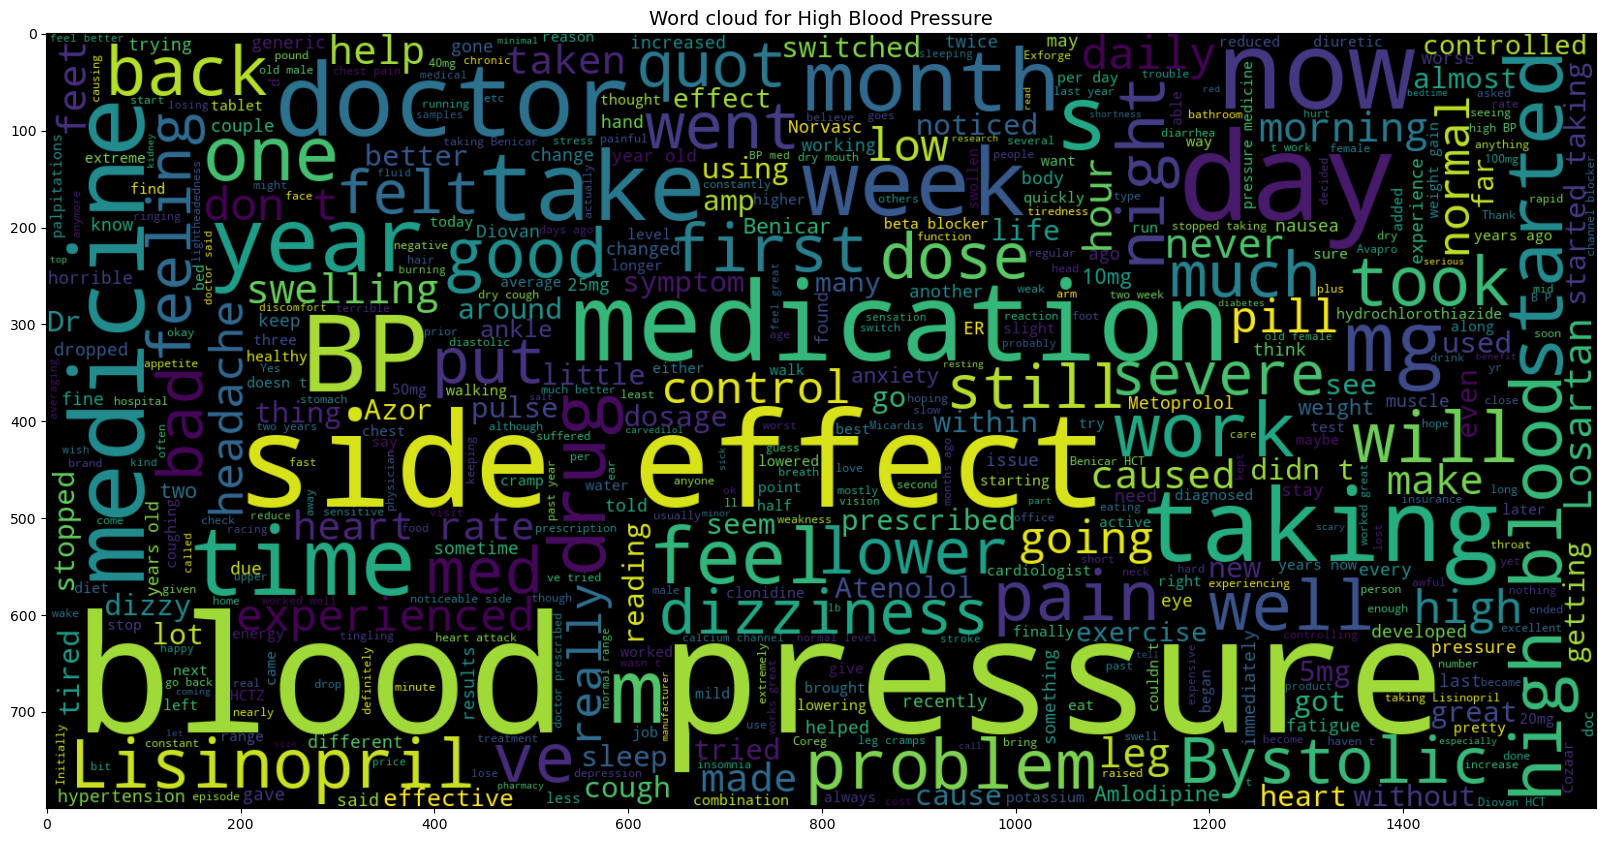

In [104]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

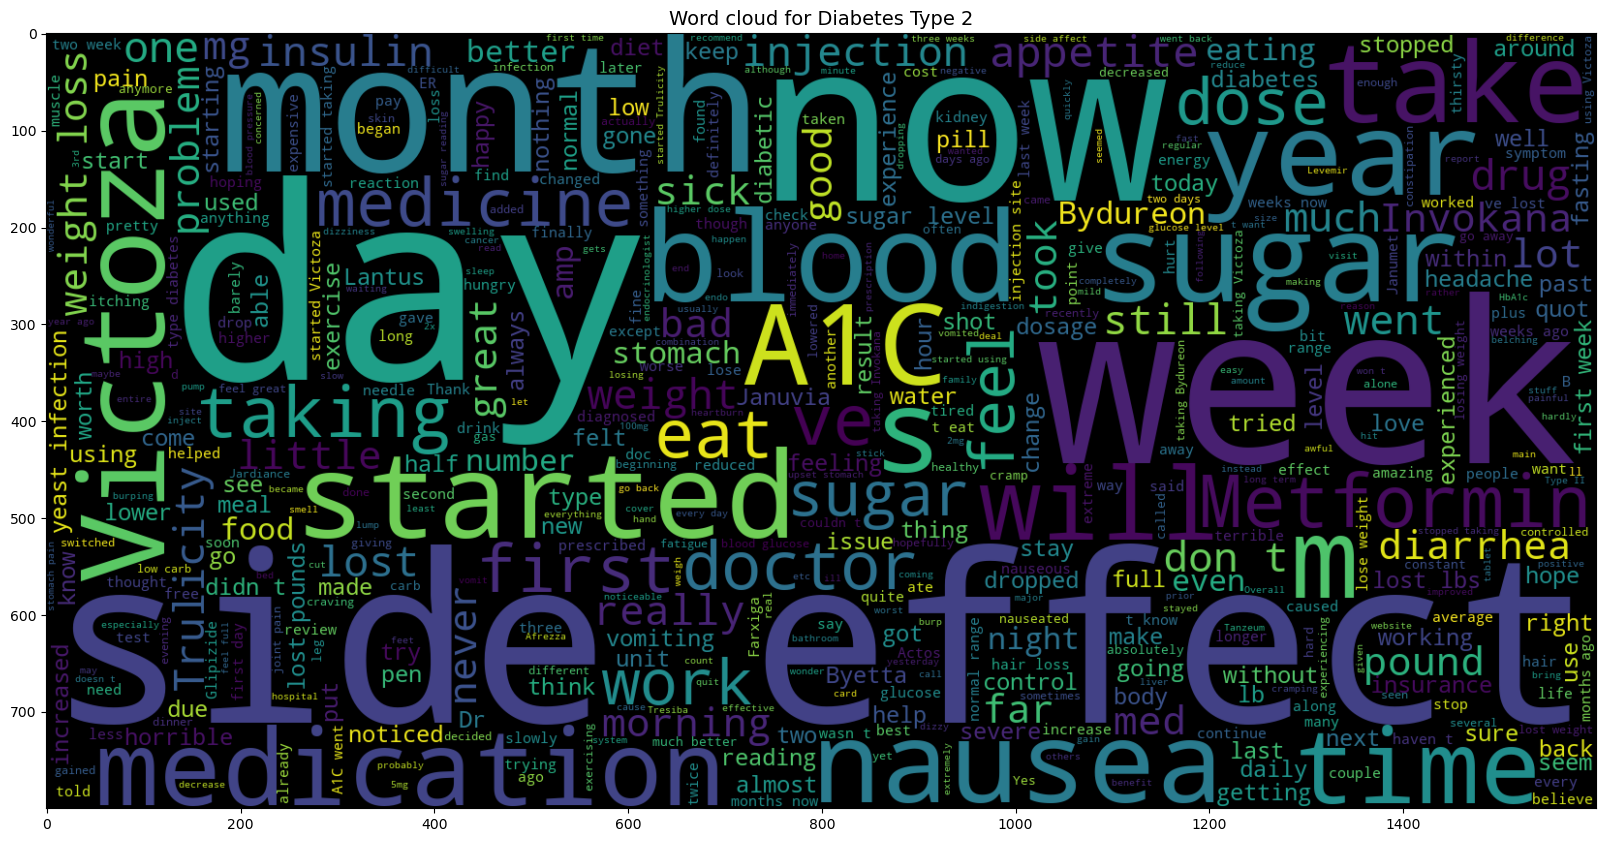

In [105]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

## data preprocessing

In [44]:
X['review'][2]

'"Quick reduction of symptoms"'

In [45]:
X['review'][11]

'"Honestly its day one on the 3 day treatment. Yes it burns a bit and it does leak out if you dont lay down after insertion. But im faithful it will work."'

In [46]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [47]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\jilan\AppData\Local\Temp\ipykernel_14940\999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [48]:
X.head()

condition  \
0  Depression                     
1  Crohn's Disease, Maintenance   
2  Urinary Tract Infection        
3  Weight Loss                    
4  Birth Control                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         review  
0  I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.                                                                                                                                                                                                                                                                                                                                                         
1  My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
2  Quick reduction of symptoms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
3  Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I have only been on it a few days, I don&#039;t know if I&#039;ve lost weight (I don&#039;t have a scale), but my clothes do feel a little looser, so maybe a pound or two. I&#039;m hoping that aft

### What are stopwords ?

Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

The most common words used in a text are **“the”, “is”, “in”, “for”, “where”, “when”, “to”, “at”** etc.

In [49]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [50]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization
Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [21]:
#from IPython.display import Image
#Image(filename='stem.JPG')

FileNotFoundError: [Errno 2] No such file or directory: 'stem.JPG'

In [51]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [52]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [53]:
from nltk.stem import WordNetLemmatizer
import zipfile

In [54]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [43]:
'''import nltk
nltk.download('omw-1.4')'''

KeyboardInterrupt: 

In [55]:
from bs4 import BeautifulSoup
import re

In [56]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [57]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\jilan\AppData\Local\Temp\ipykernel_14940\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [58]:
X.head()

condition  \
0  Depression                     
1  Crohn's Disease, Maintenance   
2  Urinary Tract Infection        
3  Weight Loss                    
4  Birth Control                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         review  \
0  I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.                                                                                                                                                                                                                                                                                                                                                          
1  My son has Crohn&#039;s disease and has done very well on the Asacol.  He has no complaints and shows no side effects.  He has taken as many as nine tablets per day at one time.  I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  Quick reduction of symptoms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3  Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I have only been on it a few days, I don&#039;t know if I&#039;ve lost weight (I don&#039;t have a scale), but my clothes do feel a little looser, so maybe a pound or two. I&#039;m hoping that

## Creating features and Target Variable

In [66]:
X_feat=X['review_clean']
y=X['condition']

In [78]:
label_counts = df['condition'].value_counts()
selected_labels = label_counts[label_counts > 50].index #50 is for most occurred 50 medical conditions.
filtered_df = df[df['condition'].isin(selected_labels)]

filtered_df['review_clean'] = filtered_df['review'].apply(review_to_words)


X_filtered = filtered_df['review_clean']  # Assuming 'review_clean' is your feature column
y_filtered = filtered_df['condition']
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=0
)

C:\Users\jilan\AppData\Local\Temp\ipykernel_14940\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
C:\Users\jilan\AppData\Local\Temp\ipykernel_14940\939292707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['review_clean'] = filtered_df['review'].apply(review_to_words)


In [ ]:
stratify=y_filtered,

In [79]:
y=filtered_df['condition']

In [80]:
print(filtered_df.columns)


Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'review_clean'],
      dtype='object')


In [81]:
y.values.reshape(1,-1)
y

0        Depression                       
1        Crohn's Disease, Maintenance     
2        Urinary Tract Infection          
3        Weight Loss                      
4        Birth Control                    
6        Birth Control                    
7        Migraine Prevention              
8        Opiate Withdrawal                
9        Birth Control                    
10       Hot Flashes                      
11       Vaginal Yeast Infection          
12       Weight Loss                      
13       Schizoaffective Disorde          
14       Insomnia                         
15       Narcolepsy                       
16       Smoking Cessation                
17       Acne                             
18       Bipolar Disorde                  
19       Urinary Tract Infection          
20       Insomnia                         
21       Irritable Bowel Syndrome         
22       Bipolar Disorde                  
24       Hyperhidrosis                    
25       Bi

In [77]:
#............................no need to execute.....................!!!!!
#X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [53471, 48247]

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [83]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [84]:
count_train

<38597x23434 sparse matrix of type '<class 'numpy.int64'>'
	with 1152845 stored elements in Compressed Sparse Row format>

## Machine Learning Model : Naive Bayes

In [85]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

'''cm = metrics.confusion_matrix(y_test, pred)
all_labels = np.unique(y)
plot_confusion_matrix(cm, classes=all_labels)'''

accuracy:   0.568


'cm = metrics.confusion_matrix(y_test, pred)\nall_labels = np.unique(y)\nplot_confusion_matrix(cm, classes=all_labels)'

## Machine Learning Model : Passive Aggressive Classifier

In [86]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
print("##")
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("##")
print("accuracy:   %0.3f" % score)


##
##
accuracy:   0.658


### TFIDF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [65]:
###### Machine Learning Model : Naive Bayes

In [88]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.333


## Machine Learning Model TFIDF

In [89]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


accuracy:   0.687


## TFIDF: Bigrams

In [104]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

In [105]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.748


## TFIDF : Trigrams

In [107]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

accuracy:   0.745


## Most important Features

In [108]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Birth Control')

Birth Control wednesday started 2.942836660732011
Birth Control prevention bigger 2.9465951435749065
Birth Control lb awesome 2.9696050593064567
Birth Control friday monday 2.9934061237080907
Birth Control yes clear 3.1409844274282768
Birth Control la rubbish 3.386310075079345
Birth Control saved saved 3.660967113628359
Birth Control disorder completely 3.9865594724103897
Birth Control disorder exacerbated 4.223946160145971
Birth Control cycle best 4.383138110700018


In [109]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression pushing dose 2.2530337602217
Depression exercise lialda 2.278213526686093
Depression forward improvement 2.486163079105379
Depression best mylan 2.5257888104195856
Depression moving work 2.65119310123789
Depression listless day 2.806308370010909
Depression moody bleed 2.948155202593169
Depression round today 3.4463906386788454
Depression blue vein 3.9987258654523816
Depression movie used 8.129183538927066


In [110]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'High Blood Pressure')

High Blood Pressure relief loose 2.006719993831292
High Blood Pressure know yasmin 2.0123046571987495
High Blood Pressure sleep maintained 2.363341855313457
High Blood Pressure open educational 2.593800500459497
High Blood Pressure beyaz night 2.769374222126176
High Blood Pressure consume thought 2.811426256975179
High Blood Pressure fashioned 3.547088571189419
High Blood Pressure drug hospice 3.623771250156303
High Blood Pressure deposit provera 4.060750293130909
High Blood Pressure emotionally eat 6.167211517044586


In [111]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 problem rough 1.8450364299442255
Diabetes, Type 2 woke light 1.8536981758423026
Diabetes, Type 2 astonished viral 1.879679285222061
Diabetes, Type 2 alternative birth 2.0574202627850564
Diabetes, Type 2 sulfa medicine 2.2395553017809107
Diabetes, Type 2 right date 2.4425862418833826
Diabetes, Type 2 far vaginal 3.133614317721822
Diabetes, Type 2 woman bleeding 3.3231383074459093
Diabetes, Type 2 drug senior 3.440677698453976
Diabetes, Type 2 far scary 4.9448594381149515


## Sample Predictions

In [112]:
X.tail()

condition  \
53761  Breast Cancer, Prevention   
53762  Anxiety                     
53763  Birth Control               
53764  Pain                        
53765  Sciatica                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  \
53761  I have taken Tamoxifen for 5 years. Side effects are severe sweating and depression. I have been taking Effexor XR longer than I have been on Tamoxifen. My Oncologist increased the Effexor dosage from 75 mg to 150 mg per day. She assure me the Effexor and Black Cohoosh would STOP the sweating...NOT. SWEATING INCREASED AND I AM MORE DEPRESSED THAN EVER. I had a sonogram last month that revealed a very small fibroid and fluid in my uterus. Got an appointment with GYN next week to see how she wants to handle the uterus problem.                                                                                                                                                                                                                                                           
53762  I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt really sick the first two weeks on this drug. But you HAVE to give the drug time. For me, I didn&#039;t really start noticing the drugs positive effects for about two months. I took Zoloft before this and felt like it made me too tired and absent-minded. Luckily, Lexapro doesn&#039;t seem to have this effect (although I do drink caffeinated drinks). I like Lexapro not only because my anxiety and depression is completely gone, but I feel like I can finally handle everything in my life now (I&#039;m a working full-time college student). I highly recommend this drug.                    
53763  I&#039;m married, 34 years old and I have no kids. Taking the pill was such a hassle so I decided to get the Mirena. It was very painful when it was inserted,then had cramping for the rest of that day! For the first 6 weeks I spotted off and on and then my periods just stopped. I still got cramps every few months, but never needed to take anything. The 5th and final year of me having Mirena, I started to spot monthly. I called my OB, they just said that the levonorgestrel wears off over time. I made the decision that I was going to have another one put in. Taking the old one out didn&#039;t hurt at all, you feel a little pressure. Inserting the new one was less painful but still uncomfortable. It&#039;s been 4 days and I still have a little cramping but overall HAPPY.   
53764  I was prescribed Nucynta for severe neck/shoulder pain. After taking only 2, 75mg pills I was rushed to the ER with severe breathing problems. I have never had any issues with pain medicines before.                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [113]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [114]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [115]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [116]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Telmisartan
Amlodipine
Micardis

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Cymbalta
Citalopram

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am l

In [117]:
df_testsent = predict_text(sentences)
df_testsent

test_sent  \
0  tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation   
1  third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap                                                                                                                                                   
2  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                                                           

            prediction  
0  High Blood Pressure  
1  Depression           
2  Diabetes, Type 2

In [118]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [119]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt really sick the first two weeks on this drug. But you HAVE to give the drug time. For me, I didn&#039;t really start noticing the drugs positive effects for about two months. I took Zoloft before this and felt like it made me too tired and absent-minded. Luckily, Lexapro doesn&#039;t seem to have this effect (although I do drink caffeinated drinks). I like Lexapro not only because my anxiety and depression is completely gone, but I feel like I can finally handle everything in my life now (I&#039;m a working full-time college student). I highly recommend this drug."]))
test[0]

'Anxiety'